# Etivity 5 - PCA

### Student Name:   Mark Murnane

### Student ID:     18195326
___

## Task Description

This week's task is to develop a class that applies the Principal Component Analysis algorithm to a data set.  The results generated by this class should be compared to the results available using the PCA implementation from the _scikit-learn_ machine learning library.

For the implementation, and comparison the class should include:
 - A `fit()` method to calculate the Eigen values and Eigen vectors of a supplied data set
 - A `transform()` method to apply the PCA calculation model (using the parameters calculated in `fit()`) to a data set
 - A parameter to allow the number of principal components applied in the model to be specified
 - An `inverse_transform()` method to construct a representation of the original data set.
 
The results will be compared to the _scikit-learn_ output using a combination of comments and graphs based on `matplotlib.plot`.

### Prescribed imports & Data Generation

The following code has been provided as part of this exercise.

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [2]:
a_x = 0.05
a_y= 10

In [3]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
data

array([[ 0.        , -4.86769659],
       [ 1.02494526,  4.70709972],
       [ 2.02563159,  7.68809079],
       [ 3.05794372, 14.94999045],
       [ 3.99028486, 20.28557439],
       [ 4.94551667, 22.46516033],
       [ 5.96163809, 21.77051651],
       [ 6.84874247, 27.32986814],
       [ 8.10435719, 36.09253463],
       [ 9.09763456, 35.38435642],
       [ 9.79452463, 36.01960025],
       [11.27275634, 46.58769563],
       [11.72930182, 48.01261015],
       [12.77091648, 53.35435385],
       [14.23512447, 58.78708453],
       [15.36534231, 57.85365871],
       [16.04174471, 59.56591909],
       [16.98621886, 64.80061941],
       [18.0100395 , 76.92124409],
       [18.69541784, 74.14089568]])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [4]:
data.shape

(20, 2)

## Task Implementation

I changed the definition of the data from an `np.matrix` to an `np.array`.  

In the `fit()` method I used a different mechanism of calculating the `_mean` value.  This was completed before I realised that I could use an `axis` parameter with `np.mean` but the effect is the same.  

By contrast, the calculation of the covariant was accomplished using a parameter modifier, rather than tranposing the centered matrix.

In [148]:
class MyPCA(object):
    """Implementation of the Principal Component Analysis algorithm for identifying the most signicant dimensions of a data set.
       The dimensions that are not significant can be considered for removal from the data set for easier visualation or 
       other analysis of the data set.
       
       This PCA implementation should be trained with a data set using the fit() method.
       
       Once trained, the PCA model can be applied to a data set using the transform() method.
       
       Parameters
       ----------
           n_components:(int, float)   The number of principal dimensions that the model should evaluate.
                                       If a non-integer value is used, it will be rounded down to an integer (floor).
           
       Attributes       
       ----------
           eigenvalues(ndarray)            List of Eigen values of the PCA model, ordered by descending magnitude, i.e. most significant first
           feature_vector_matrix(ndarray)  List of Eigen vectors of the PCA model, also order by descending magnitude.
                                           Note the vectors are represented as columns of the array.
                                           
       Exceptions
       ----------
           TypeError        If the value of n_components is not a numeric type (int or float)
           ValueError       If the value of n_components is not a positive number.
    """
    def __init__(self, n_components):
        if not isinstance(n_components, (int,float)):
            raise TypeError("The parameter n_components should be a numeric type (int/float).")
        elif n_components <= 0:
            raise ValueError("The parameter n_components should be a positive number.")
        
        # Round down
        self._num_components = n_components // 1
        
        
    def fit (self, A):
        """Performs PCA algorithm to derive the mean, Eigenvalues and Eigenvectors of the array A.
        
        Args:
            A (numpy.ndarray)    A 2D array where each column represents a dimension and the rows contain their observations.             
        """
        
        # First of all, calculate the mean for each of the columns
        self._mean = np.array([np.mean(A[:,column]) for column in range(A.shape[1])])
        
        # Then calculate the centred matrix, which deducts the mean from each value
        centered = A - self._mean
        
        # Calculate the covariant matrix for the centered matrix.
        covariant = np.cov(centered, rowvar=False)
                
        # Next, generate the Eigen Values and Eigen Vectors for the covariant matrix.
        self.eigenvalues, eigenvectors = eig(covariant)
        
        # Sort the Eigen values and Eigen Vectors descending, using the sort order reversed.  
        # The sort order for the eigenvalues is based on magnitude/absolute value, not simply a numerical sort        
        sort_order = np.argsort(self.eigenvalues**2)[::-1]
        self.eigenvalues = self.eigenvalues[sort_order]
        eigenvectors = eigenvectors[:,sort_order]
               

        # If we require fewer dimensions than the number of dimensions in the model, drop the extra values/vectors        
        if (self._num_components < eigenvectors.shape[1]):
            self.eigenvalues = self.eigenvalues[:self._num_components]
            self.feature_vector_matrix = eigenvectors[:,:self._num_components]
        else:
            self.feature_vector_matrix = eigenvectors
        
        self._fitcomplete = True
        
        
    def transform(self, data):
        """Applies the transformation represented by this PCA model to the input data set.
        
        Args:
            data (numpy.ndarray)   Input data set where each column represents a dimension and the rows contain their observations.
                                   The shape of the data set should match that used for the PCA.fit() method.
                                   
        Raises:
            Exception          Error when the model hasn't been trained.
        """

        if not self._fitcomplete:
            raise Exception("This PCA instance has not been trained yet.  Train the model using the fit() method.")

        # The transform centres the input data set, and then apples the Eigen vectors from this model 
        # (reduced to the number of components) to the input data       
        data_centered = data - self._mean
                         
        return (self.feature_vector_matrix.T @ (data_centered.T)).T
    
    
    def inverse_transform(self, reduced_data):
        """Re-creates an original data set from a reduced data set, using the parameters of this PCA instance.
        
        Args:
            reduced_data(numpy.ndarray)  A data set that has been reduced using the transform() method.
            
        Returns:
            (numpy.ndarray)  A data set representing the original data set passed to the transform method.
        """
        original_data = (reduced_data  @ self.feature_vector_matrix.T) + self._mean
        
        return original_data
        
        
    

###############################
# Test the model
###############################

pca = PCA(n_components=2)
pca.fit(data)

my_pca = MyPCA(2)
my_pca.fit(data)


print()
print(f"scikit-learn PCA Eigen values are:\t\t{pca.explained_variance_}")
print(f"The myPCA Eigen values are:\t\t\t{my_pca.eigenvalues}\n")

print()
print(f"scikit-learn PCA Variance Ratio is:\t\t{pca.explained_variance_ratio_}")

print()
print(f"scikit-learn PCA Eigen vectors (original as row vectors):\n{pca.components_}\n")
print(f"scikit-learn PCA Eigen vectors (transposed to column vectors):\n{pca.components_.T}\n")
print(f"The my PCA Eigen vectors (original as column vectors):\n{myP.feature_vector_matrix}") 


scikit-learn PCA Eigen values are:		[5.91429682e+02 5.14410838e-01]
The myPCA Eigen values are:			[5.91429682e+02 5.14410838e-01]


scikit-learn PCA Variance Ratio is:		[9.99130981e-01 8.69019294e-04]

scikit-learn PCA Eigen vectors (original as row vectors):
[[-0.2413446  -0.97043948]
 [ 0.97043948 -0.2413446 ]]

scikit-learn PCA Eigen vectors (transposed to column vectors):
[[-0.2413446   0.97043948]
 [-0.97043948 -0.2413446 ]]

The my PCA Eigen vectors (original as column vectors):
[[-0.2413446  -0.97043948]
 [-0.97043948  0.2413446 ]]


### Eigen Vectors & Eigen Values Comparison

The Eigen Values produced by MyPCA and scikit-learn are identical.  This indicates that both approaches are identifying the same relationship between the dimensions of the data set.

In the above output I've transposed the value of scikit-learn PCA's `components_` property, as it stores the Eigen Vectors as  row vectors.  The Eigen vectors produced by `numpy.linalg.eig()` are stored as column vectors.  Transposing one or other allows a simpler comparison.

The Eigen Vectors produced by MyPCA represent the same "best fit" line as those generated by scikit-learn.  The principal component Eigen Vector (1st column) is the same in both cases (at time of writing).  The second component has the same values, but the opposite orientation.  This is not an issue, however, as both values are colinear, that is the **_span_** of each vector is the same.

In other scenarios, both vectors have been opposites, but again the span is the same, so that is not an issue.  

Based on an explanation on Stackoverflow [here](https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative) my understanding is that this is because scikit-learn ensures a deterministic output.  The `svd_flip` function is used to achieve this, where the actual SVD formula doesn't require this be so.

A visual comparison of the Eigen Vectors is useful though.  For any given set of vectors, the values should be identical, or else the inverse of each other.  In the diagram below:

* Green is the 1st component of MyPCA
* Red is the 1st component of scikit-learn PCA
* Blue is the 2nd component of MyPCA
* Yellow is the 2nd component of scikit-learn PCA

In all cases, the vectors should either overlap or have the same span.  The 2nd components should be perpendicular to the 1st components.

**N.B.** Once again `pca.components_` has been transposed for a correct comparison.

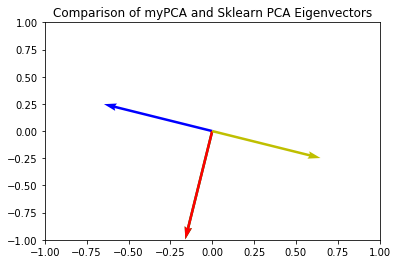

In [18]:
plt.title("Comparison of MyPCA and Sklearn PCA Eigenvectors")
plt.quiver(*[[0],[0]], *my_pca.feature_vector_matrix, color=['g', 'b'], scale=3)
plt.quiver(*[[0],[0]], *pca.components_.T, color=['r', 'y'], scale=3)

plt.axis(xmin=-1, xmax=1, ymax=1, ymin=-1)
plt.show()

### Transform comparison

A comparison of the output from each `transform()` method shows that the 1st dimension values are identical, or nearly so.  The magnitude of the 2nd dimension is very similar at each point, but they have a different orientation, as a result of the 2nd component Eigen vectors having a different orientation.

In [131]:
sc_transform = pca.transform(data)
my_transform = my_pca.transform(data)

print(sc_transform)
print("*"*80)
print(my_transform)

[[ 4.39824987e+01  1.15106038e+00]
 [ 3.44433734e+01 -1.65117649e-01]
 [ 3.13089917e+01  8.65417841e-02]
 [ 2.40126146e+01 -6.64282030e-01]
 [ 1.86097378e+01 -1.04721575e+00]
 [ 1.62640415e+01 -6.46252379e-01]
 [ 1.66929159e+01  5.07480500e-01]
 [ 1.10838037e+01  2.66421196e-02]
 [ 2.27713039e+00 -8.69682012e-01]
 [ 2.72465236e+00  2.65148547e-01]
 [ 1.93999601e+00  7.88125524e-01]
 [-8.67246422e+00 -3.27892809e-01]
 [-1.01654423e+01 -2.28738470e-01]
 [-1.56006694e+01 -5.07115476e-01]
 [-2.12261844e+01 -3.97350435e-01]
 [-2.05931231e+01  9.24734859e-01]
 [-2.24180142e+01  1.16789766e+00]
 [-2.77259178e+01  8.21086006e-01]
 [-3.97353441e+01 -1.11060532e+00]
 [-3.72025966e+01  2.25534949e-01]]
********************************************************************************
[[ 4.39824987e+01 -1.15106038e+00]
 [ 3.44433734e+01  1.65117649e-01]
 [ 3.13089917e+01 -8.65417841e-02]
 [ 2.40126146e+01  6.64282030e-01]
 [ 1.86097378e+01  1.04721575e+00]
 [ 1.62640415e+01  6.46252379e-01]
 [ 1.669

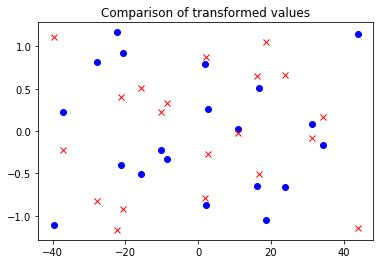

In [133]:
plt.title("Comparison of transformed values")
plt.plot(sc_transform[:,0], sc_transform[:,1], 'bo')
plt.plot(my_transform[:,0], my_transform[:,1], 'rx')
plt.show()

The graph above shows the symmetry between the two data sets (scikit-learn in blue; MyPCA in red).  

### scikit-learn PCA *n_components* differences

The following code shows output from scikit-learn PCA with n_components=1 vs. the output earlier.

In [136]:
one_pca = PCA(n_components=1)
one_pca.fit(data)

print("scikit-learn PCA Eigen things when n_components = 1\n")
print(f"Eigen values:\t{one_pca.explained_variance_}")
print(f"Variance Ratio:\t{one_pca.explained_variance_ratio_}\n")
print(f"Eigen vectors (column vector):\n{one_pca.components_.T}")


scikit-learn PCA Eigen things when n_components = 1

Eigen values:	[591.42968214]
Variance Ratio:	[0.99913098]

Eigen vectors (column vector):
[[-0.2413446 ]
 [-0.97043948]]


The Eigen value and vector returned are the most significant dimension of the dataset as seen be comparing to the results .  

The `components_` value demonstrates that scikit-learn only stores the first *n_components_* Eigen Value and Eigen Vectors for the transformation.  Consquently if you want to use a different number of components after the training of the model, it is necessary to create a new `PCA` instance with the different `n_components` value.

The absence of other dimensions from the data set also implies that it will not be possible to completely restore the original data set.  The value of `explained_variance_ratio_` would identify just how much data has been lost.  What can be lost is specific to the application of the PCA (e.g. analysis vs. image compression/storage).

### Comparison for only 1st Principial Component from each class

In [96]:
my_one_pca = MyPCA(n_components=1)
my_one_pca.fit(data)


print("MyPCA Eigen things when n_components = 1\n")
print(f"Eigen values: {my_one_pca.eigenvalues}")
print(f"Eigen vectors (column vector):\n{my_one_pca.feature_vector_matrix}")

MyPCA Eigen things when n_components = 1

Eigen values: [591.42968214]
Eigen vectors (column vector):
[[-0.2413446 ]
 [-0.97043948]]


The Eigen Value and Eigen Vector returned for both classes is the same.  The output of the `transform()` method of both is almost identical.  When compared all of the resulting values were less than 1.0e-13.  This level of tolerance could be due to very small differences in calculation between the different implementations.

In [124]:
sk_transform = one_pca.transform(data)
mm_transform = my_one_pca.transform(data)

if np.allclose(sk_transform, mm_transform):
    print("The output of the transform is almost identical between the two PCA methods")
else:
    print("The output of the transform methods is too different to be considered the same")
    
print(f"The maximum element difference is {np.amax(sk_transform - mm_transform)}\n")

The output of the transform is almost identical between the two PCA methods
The maximum element difference is 2.1316282072803006e-14



# Reflection

## General Code Changes

The two most significant code changes from the initial Task submission are:

* Squaring the Eigen Values in `fit()` to ensure they were sorted by absolute value.  This approach was used by **Cormac Lavery** and until I saw it I hadn't properly taken account of the absolute value sorting.  **Cathal Cronin** suggested using the `abs()` function, so it would be interesting if there was a performance difference between the two.<br/><br/>

* Based on the finding from **Martin Power** that scikit-learn PCA used row vectors for the Eigen Values, I realised that my own sort code was incorrect.  While I continue to use column vectors the initial code submission incorrectly sorted my Eigen Vectors. As a result my 2nd dimension transformations were incorrect.<br/><br/>Additionally, while I could see a correlation between the values, I couldn't properly explain it.  Martin's revelation led me to resolving this mystery.<br/><br/> 

Additional code changes:

* While cleaning up the vectors, I collapsed the sorting code into fewer lines.<br/><br/>

* Added an `inverse_transform()` method to handled Reflection exercises.<br/><br/>

* Added some docstrings and error handling code<br/><br/>

## Comparison of transformed data sets between _MyPCA_ and _Scikitlearn PCA_

The following graph shows the difference between the reconstructed data sets.  This minimal difference suggests the transformed data should have a similar level of similarity.  

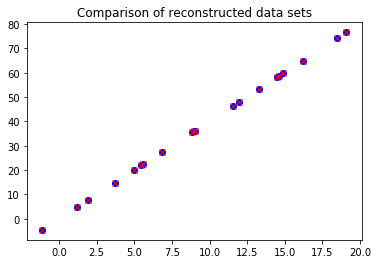


The output of the transform is almost identical between the two PCA methods
The maximum element difference is 1.4210854715202004e-14



In [128]:
sk_reduced = one_pca.inverse_transform(sk_transform)
mm_reduced = my_one_pca.inverse_transform(mm_transform)

plt.title("Comparison of reconstructed data sets")
plt.plot(sk_reduced[:,0], sk_reduced[:,1], 'bo')
plt.plot(mm_reduced[:,0], mm_reduced[:,1], 'rx')
plt.show()

print()
if np.allclose(sk_reduced, mm_reduced):
    print("The output of the transform is almost identical between the two PCA methods")
else:
    print("The output of the transform methods is too different to be considered the same")
    
print(f"The maximum element difference is {np.amax(sk_reduced - mm_reduced)}\n")

The points of the reconstructed data set do not differ in any significant way.

## Comparison of Original and _MyPCA_ reconstructed data set

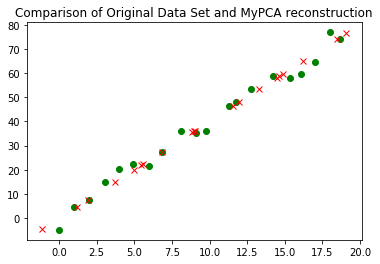

In [137]:
plt.title("Comparison of Original Data Set and MyPCA reconstruction")
plt.plot(data[:,0], data[:,1], 'go')
plt.plot(mm_reduced[:,0], mm_reduced[:,1], 'rx')
plt.show()

The plot above shows that the re-constructed data set from MyPCA is very similar to the original data set.  

The principal finding from this comparison then is that PCA provides a mechanism to represent the original data set using less dimensions, and hence less data, without significant loss of fidelity in the data set and results.  This reduction in data can have significant benefits either as a data compression mechanism (e.g. for images) or to reduce a data set to something that can be visualised by people (e.g. 4D -> 3D or 2D).

Equally, in very large data sets it can also be used to identify the most important dimensions and allow them to be explored more fully.

PCA achieves this by finding the statiscally most important dimension(s) in the source data set.  These dimensions (represented by the Eigen Values and Eigen Vectors) are the most important in determining the grouping of the original data set.  Conversely PCA also determines the least important dimensions of the data set.  This can be represented in absolute terms by the Eigen Values, or relatively by calculating the Variance Ratio.

Using the example above (given that MyPCA and scikit-learn produced similar results) the variance ratio for the data set indicates that reducing the data set to the 1st principal component will describe 99.913% of variation in the original data set.  Conversely the 2nd component plays almost no role in describing variations in the data.  To all intents and purposes, it can be ignored.

The actual variance thresholds used to decide when to eliminate a component (or what components are of interest) will be domain specific.  In general, however, those close to 0 can be reduced.